In [73]:
import re
import time
import requests
import bs4
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup

my_url = 'https://www.rottentomatoes.com/top/bestofrt/'

# grabbing connection
uClient = uReq(my_url)
page_html = uClient.read()
uClient.close()

with open('group_project' + '_' + 'movielist'+'.txt','w') as fw:
    
    # html parser
    page_soup = soup(page_html, "html.parser")

    # gather movies
    containers = page_soup.findAll("table", {"class":"table"})

    for container in containers:
        movie_rank_container = container.findAll("td", {"class":"bold"})
        movie_name_container = container.findAll("a", {"class":"unstyled articleLink"})

        for movie_rank, movie_names, in zip(movie_rank_container, movie_name_container):
    
            #print(movie_rank.text.strip() ,'  ', movie_names.text.strip())
            #write everything to file    		
            fw.write(movie_names.text.strip()+'\n')
       


In [8]:
my_url = 'https://www.rottentomatoes.com/top/bestofrt/'

# grabbing connection
uClient = uReq(my_url)
page_html = uClient.read()
uClient.close()

with open('group_project' + '_' + 'movielist2'+'.txt','w') as fw:
    
    # html parser
    page_soup = soup(page_html, "html.parser")

    # gather movies
    containers = page_soup.findAll("table", {"class":"table"})

    for container in containers:
        movie_name = re.findall("/m/(.+)\"", str(container))

#print(movie_name)

In [74]:
#for movie in movie_name:
    #print('https://www.rottentomatoes.com/m/' + movie + '/reviews/')

In [22]:
page_count = 0
new_list=[]
with open('top_movie_reviews'+'.csv','w') as fw:
    for movie in movie_name:
        url = 'https://www.rottentomatoes.com/m/' + movie + '/reviews/'
       
        html=None        
            
        pageLink=url 
 
        for i in range(5): 
            try:
                    # get url content
                response = requests.get(pageLink,headers = { 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36', })
                    # get the html
                html=response.content
                    # if we successuflly got the file, break the loop
                break 
                # requests.get() threw an exception, i.e., the attempt to get the response failed
            except:
                print ('failed attempt #',i)
                    # wait 2 secs before trying again
                time.sleep(2)

        if not html:
                # couldnt get the page, ignore
            print('could not get page #', p)
            continue 
        
            # if we got the page, parse the html file
            # first, turn it into a beautiful soup object
        soup_2 = soup(html.decode('ascii', 'ignore'),'lxml')
        
            # then get all the review divs
        reviews=soup_2.findAll('div', {'class':re.compile('review_table_row')})
        
            # grab the information for each review
        page_count += 1 
        print ('Parsing page',page_count)
        
        
        for review in reviews:
            
            # initialize critic, rating, source, text, date
            critic,rating,source,text,date='NA','NA','NA','NA','NA'
            
            # 1. if there is critic name information, get it
            criticChunk=review.find('a',{'href':re.compile('/critic/')})
            if criticChunk: 
                critic=criticChunk.text.strip()
            
                          # 2. if there is rating information, get it ;
                # The rating should be 'rotten' , 'fresh', or 'NA' if the review doesn't have a rating.
            ratingfresh=review.find("div", attrs={"class":"review_icon icon small fresh"} )
            ratingrotten=review.find("div", attrs={"class":"review_icon icon small rotten"} )
            if ratingfresh:
                rating= '1'
            if ratingrotten:
                rating= '0'
            
            
            # 3. if there is source information, get it
            sourceChunk=review.find("em", attrs={"class":"subtle critic-publication"})
            if sourceChunk:
                source=sourceChunk.text.strip()
            
            
            # 4. if there is text information, get it    
            
            T=review.find("div", attrs={"class":"the_review"})
            if T:
                text=T.text.strip()
            
            # 5. if there is date information, get it    
            D=review.find("div", attrs={"class":"review-date subtle small"})
            if D:
                date=D.text.strip()
            

            #write everything to file    		
            
            fw.write("\"" + critic + "\"" + ','+rating +"\"" + ',' + text + '\n')
            
          
            new_list.append([critic,rating,source,text,date])
            
    print ('Done!')
            #print(critic+'\t'+rating+'\t'+source+'\t'+text+'\t'+date+'\n')
            

        
#we create a csv file here and planed to create df by csv file, but we met some problems that can't be solved before ddl
#so we dind't use it in the following steps. 
#another problem is the url of film, as I sent in the whatsapp

Parsing page 1
Parsing page 2
Parsing page 3
Parsing page 4
Parsing page 5
Parsing page 6
Parsing page 7
Parsing page 8
Parsing page 9
Parsing page 10
Parsing page 11
Parsing page 12
Parsing page 13
Parsing page 14
Parsing page 15
Parsing page 16
Parsing page 17
Parsing page 18
Parsing page 19
Parsing page 20
Parsing page 21
Parsing page 22
Parsing page 23
Parsing page 24
Parsing page 25
Parsing page 26
Parsing page 27
Parsing page 28
Parsing page 29
Parsing page 30
Parsing page 31
Parsing page 32
Parsing page 33
Parsing page 34
Parsing page 35
Parsing page 36
Parsing page 37
Parsing page 38
Parsing page 39
Parsing page 40
Parsing page 41
Parsing page 42
Parsing page 43
Parsing page 44
Parsing page 45
Parsing page 46
Parsing page 47
Parsing page 48
Parsing page 49
Parsing page 50
Parsing page 51
Parsing page 52
Parsing page 53
Parsing page 54
Parsing page 55
Parsing page 56
Parsing page 57
Parsing page 58
Parsing page 59
Parsing page 60
Parsing page 61
Parsing page 62
Parsing page 63
P

# Data Frame part (part2)

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
df=pd.DataFrame(new_list,columns=['reviewer','rate',"source","text","date"])


In [14]:
df

,reviewer,rate,source,text,date
0,Dan Buffa,1,KSDK News (St. Louis),Here's the thing: you can enjoy Black Panther ...,"November 6, 2020"
1,Paul McGuire Grimes,1,"KSTP-TV (St. Paul, MN)","As the new king, T'Challa has to wrestle with ...","November 4, 2020"
2,Matthew St. Clair,1,Cinema Sentries,Brilliantly brought to life by the production ...,"October 9, 2020"
3,Ade Adeniji,1,AdeAdeniji.com,You know there must be something special about...,"October 8, 2020"
4,Brandon Avery,1,Just My Opinion Reviews,A dream come true! Near Perfection!,"September 11, 2020"
...,...,...,...,...,...
1995,Tony Sloman,1,Radio Times,"Some films you think you know well, until you ...","November 15, 2013"
1996,Neil Smith,1,Total Film,"Even in our cynical age, it still manages to i...","February 14, 2012"
1997,Kevin Harley,1,Total Film,At the heart of this art is the thrill of the ...,"February 14, 2012"
1998,Tim Brayton,1,Antagony & Ecstasy,"One of the crown jewels of American cinema, an...","October 29, 2009"


In [38]:
writer = pd.ExcelWriter('output.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

# Build a classifier(part3) 

In [39]:
column_names = ['Review', 'Rating']

data = pd.read_excel("output.xlsx",index_col=0,)

data.head()

,reviewer,rate,source,text,date
0,Dan Buffa,1,KSDK News (St. Louis),Here's the thing: you can enjoy Black Panther ...,"November 6, 2020"
1,Paul McGuire Grimes,1,"KSTP-TV (St. Paul, MN)","As the new king, T'Challa has to wrestle with ...","November 4, 2020"
2,Matthew St. Clair,1,Cinema Sentries,Brilliantly brought to life by the production ...,"October 9, 2020"
3,Ade Adeniji,1,AdeAdeniji.com,You know there must be something special about...,"October 8, 2020"
4,Brandon Avery,1,Just My Opinion Reviews,A dream come true! Near Perfection!,"September 11, 2020"


In [34]:
# Import models and evaluation functions
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
#from sklearn import cross_validation
#from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Import vectorizers to turn text into numeric
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import plotting
import matplotlib.pylab as plt
%matplotlib inline

In [42]:
X_text = data['text'].fillna(' ')
Y = data['rate']

In [43]:
# Create a vectorizer that will track text as binary features
binary_vectorizer = CountVectorizer(binary=True)

# Let the vectorizer learn what tokens exist in the text data
binary_vectorizer.fit(X_text)

# Turn these tokens into a numeric matrix
X = binary_vectorizer.transform(X_text)

In [44]:
X

<2000x7014 sparse matrix of type '<class 'numpy.int64'>'
	with 39797 stored elements in Compressed Sparse Row format>

In [45]:
# Create a model
logistic_regression = LogisticRegression()

# Use this model and our data to get 5-fold cross validation

from sklearn.model_selection import cross_val_score
accs = cross_val_score(logistic_regression, X, Y, scoring="accuracy", cv=5)

# Print out the average accuracy rounded to three decimal points
print("Accuracy of our classifier is " + str(round(np.mean(accs), 3)))

Accuracy of our classifier is 0.954


## tryout different models to increase accuracy

## try this one first, you will get a accuracy number

In [46]:
# Create a vectorizer that will track text as counted features
count_vectorizer = CountVectorizer()

# Let the vectorizer learn what tokens exist in the text data
count_vectorizer.fit(X_text)

# Turn these tokens into a numeric matrix
X = count_vectorizer.transform(X_text)

# Create a model
logistic_regression = LogisticRegression()

# Use this model and our data to get 5-fold cross validation AUCs
accs = cross_val_score(logistic_regression, X, Y, scoring="accuracy", cv=5)

# Print out the average AUC rounded to three decimal points
print("Accuracy of our classifier is " + str(round(np.mean(accs), 3)))

Accuracy of our classifier is 0.954


## try this one second, you will get another accuracy number

In [47]:
# Create a vectorizer that will track text as binary features
tfidf_vectorizer = TfidfVectorizer()

# Let the vectorizer learn what tokens exist in the text data
tfidf_vectorizer.fit(X_text)

# Turn these tokens into a numeric matrix
X = tfidf_vectorizer.transform(X_text)

# Create a model
logistic_regression = LogisticRegression()

# Use this model and our data to get 5-fold cross validation AUCs
aucs = cross_val_score(logistic_regression, X, Y, scoring="accuracy", cv=5)

# Print out the average AUC rounded to three decimal points
print("Accuracy of our classifier is " + str(round(np.mean(aucs), 3)))

Accuracy of our classifier is 0.955


# Increase the performance (part4)

## n gram,
## remove stopwords
## lower case
## use a stemmer
## remove punctuation
## And more

In [62]:

# Create a vectorizer that will track text as counted features
count_vectorizer = CountVectorizer( lowercase=False,ngram_range=(2, 2),stop_words='english')
# Let the vectorizer learn what tokens exist in the text data
count_vectorizer.fit(X_text)

# Turn these tokens into a numeric matrix
X = count_vectorizer.transform(X_text)

# Create a model
logistic_regression = LogisticRegression()

# Use this model and our data to get 5-fold cross validation AUCs
accs = cross_val_score(logistic_regression, X, Y, scoring="accuracy", cv=5)

# Print out the average AUC rounded to three decimal points
print("Accuracy of our classifier is " + str(round(np.mean(accs), 3)))

Accuracy of our classifier is 0.955


# Exploratory Data Analysis (PART 5)

### Scatterplot

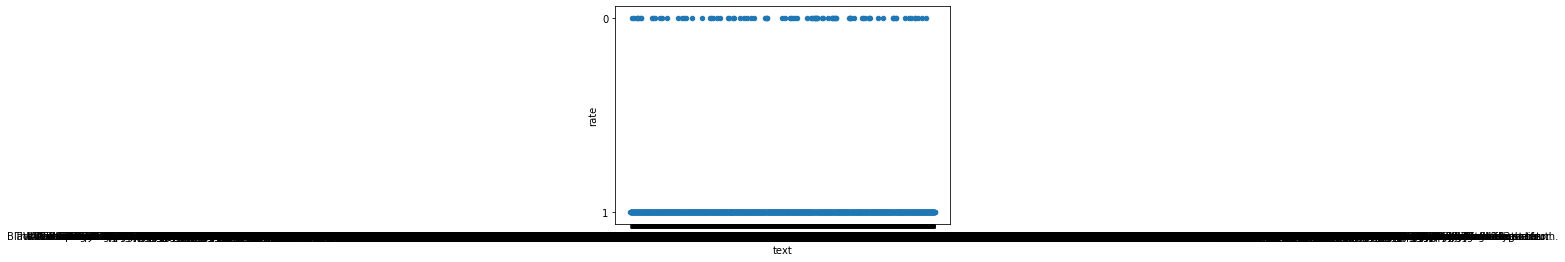

In [64]:
x_var = 'text'
y_var = 'rate'

df.plot.scatter(x=x_var, y=y_var, legend=False)

### Draw a heat map for all the numerical variables in the data frame

In [70]:
plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.show()

TypeError: iteration over a 0-d array

<Figure size 432x288 with 1 Axes>

## MORE to be add ...

In [ ]:
#dataset links:  https://drive.google.com/file/d/1sNIAVrt6fe9divJQY90prJuzm7DqwGJz/view?usp=sharing
# https://drive.google.com/file/d/10UF40jT4odx3Hs15pyE2h_NyUUZd61W2/view?usp=sharing